## Load Model Inferences

In [30]:
%%capture
!pip install pywer
import pywer
import pandas as pd
import numpy as np
import os

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from google.colab import drive

drive.mount('/content/drive')

%cd '/content/drive/MyDrive/!!! greek_HTREC2022/github'

Mounted at /content/drive
/content/drive/MyDrive/!!! greek_HTREC2022/github


In [ ]:
%%capture
!pip install -U transformers
!pip install -U flair
!git clone https://github.com/pranaydeeps/Ancient-Greek-BERT.git
%cd Ancient-Greek-BERT
# In case git lfs starts failing, because GitHub repository have bandwidth limit
# You can manually download from google drive link hosted by me as an alternative, unzip and save as final-model.pt
!git lfs pull --include "final-model.pt"
!mkdir ../LM/
!git clone https://huggingface.co/pranaydeeps/Ancient-Greek-BERT ../LM/SuperPeitho-v1

In [32]:
# import OS module
import os
 
# Get the list of all files and directories
path = "results"
dir_list = os.listdir(path)
 
results = {}
for file in dir_list:
    results[file.split('.')[0]] = pd.read_csv(path+'/'+file) ['Transcriptions']

In [33]:
df_results = pd.DataFrame(results)
df_results.head(3)

,B1_edit_distance,B2_LM_based,B3_LMing,B4_RuleBase_best_second,B5_RuleBase_best_first
0,ὑπρ τη συνευςδιξοεανδνυπορ ποοδυπρας,ὑπρ τη συνευςδιξοεανδνυπορ ποοδυπρας,ὑπρ τη συνευςδιξοεανδνυπορ ποοδυπρας,ὑπο τη συνευςδιξοεανδνυπορ ποοδυπρας,ὑπο τη συνευςδιξοεανδνυπορ ποοδυπρας
1,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε
2,συ σ κατεχισωμε ἐπιτελωτι,συ σ ὑπα φωτος,συ σ κατεχισωμε ἐπιτελωτι,συ σ κατεχισωμε ἐπιτελωτι,συ σ κατεχισωμε ἐπιτελωτι


In [34]:
# data["Team"]= data["Team"].str.split("t", n = 1, expand = True)

## Load 

In [35]:
%%capture
!pip install aicrowd-cli
%load_ext aicrowd.magic

In [36]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/5rhGtRLb0zltdZgd-v8dqMTuy6bAqZUgBrNmVyx509Q
API Key valid
Gitlab access token valid
Saved details successfully!


In [37]:
!rm -rf data
!mkdir data
%aicrowd ds dl -c htrec-2022 -o data

ERROR:root:Error while reading the git config, 'NoneType' object has no attribute 'config_reader'


official_ranking.csv:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

original_test.csv:   0%|          | 0.00/37.2k [00:00<?, ?B/s]

synthetic_test.csv:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/45.5k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/395k [00:00<?, ?B/s]

In [38]:
ranks = pd.read_csv("data/official_ranking.csv")
ranks[ranks['Participants'] == 'konstantina_liagkou, manos_papadatos']

,Submission ID,Participants,rCERR,rWERR,sCERR,sWERR
6,191910,"konstantina_liagkou, manos_papadatos",0.438649,1.822330,0.095971,1.292194
11,191828,"konstantina_liagkou, manos_papadatos",0.358151,1.751984,0.052405,1.138487
12,191965,"konstantina_liagkou, manos_papadatos",0.356290,2.215188,0.117108,1.392405
13,191963,"konstantina_liagkou, manos_papadatos",0.356290,2.215188,0.145935,1.471519
14,191967,"konstantina_liagkou, manos_papadatos",0.356290,2.215188,0.145935,1.471519
15,191961,"konstantina_liagkou, manos_papadatos",0.353472,2.030002,0.162591,1.561935
25,191646,"konstantina_liagkou, manos_papadatos",0.333567,1.460738,-0.312479,-0.477949
28,191648,"konstantina_liagkou, manos_papadatos",0.314151,1.798481,-0.214330,0.348604
30,191402,"konstantina_liagkou, manos_papadatos",0.311143,1.608886,-0.083566,0.643460
34,191959,"konstantina_liagkou, manos_papadatos",0.298660,1.871272,0.180172,1.742767


In [39]:
ranks.head(10)

,Submission ID,Participants,rCERR,rWERR,sCERR,sWERR
0,191047,neverix,2.525047,14.967452,-7.719150,-23.140286
1,191394,MichaelIbrahim,1.033516,4.628908,-7.783613,-31.858892
2,190396,MichaelIbrahim,0.883911,7.884560,-11.459957,-41.621116
3,191375,MichaelIbrahim,0.653063,7.345198,-11.383133,-41.185978
4,190461,MichaelIbrahim,0.638900,5.932780,-12.716898,-43.615381
5,191686,lacemaker,0.567204,3.398529,-0.629753,-3.111860
6,191910,"konstantina_liagkou, manos_papadatos",0.438649,1.822330,0.095971,1.292194
7,191927,lacemaker,0.405168,2.601231,0.067389,0.963683
8,191916,lacemaker,0.405168,2.601231,0.067389,0.963683
9,191919,shoji,0.365037,1.520322,-0.131788,-0.688188


In [40]:
orig_df = pd.read_csv("data/original_test.csv")
syn_df = pd.read_csv("data/synthetic_test.csv")
print(f"{orig_df.shape[0]} train and {syn_df.shape[0]} instances")

180 train and 158 instances


In [41]:
orig_df[0:10]

,HUMAN_TRANSCRIPTION,SYSTEM_TRANSCRIPTION,ImageID,TEXT_LINE_NUM,CENTURY
0,πρὸς τὴν θεὸν καὶ δεῖξον ὡς ἄνευ πόνου πολλὴν ...,ὑπρ τη συνευςδιξοεανδνυπορ ποοδυπρας,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,1,14
1,Ἴακχε φιλοχορευτά συμπρόπεμπέ με,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,2,14
2,σὺ γὰρ κατεσχίσω μὲν ἐπὶ γέλωτι,συ σ κατεχισωμε ἐπιτελωτι,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,3,14
3,κἀπ εὐτελείᾳ τόδε τὸ σανδαλίσκον,κ ἀπαὐτελετία τὸν δεὲ τὸν σανἀαλισκόν,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,4,14
4,καὶ τὸ ῥάκος κἀξηῦρες ὥστ ἀζημίους παίζειν τε ...,κ τὸρακον καξεύδὡςτα ξήμής παιξτεεχηρευ,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,5,14
5,Ἴακχε φιλοχορευτά συμπρόπεμπέ με,τακχεφιλοχορ ευτα συμπρο πρμπεμε,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,6,14
6,καὶ γὰρ παραβλέψας τι μειρακίσκης,γὶ τραβλάκας κμειρακιση,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,7,14
7,νυνδὴ κατεῖδον καὶ μάλ εὐπροσώπου,γυαο δή κατεδθνς νλλς ὑπροσιτο,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,8,14
8,συμπαιστρίας χιτωνίου παραρραγέντος τιτθίον πρ...,ὲ υμεσαι σρύχετωνο παραρραία ττιτοι προηυ,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,9,14
9,Ἴακχε φιλοχορευτά συμπρόπεμπέ με,ιακχεφιλοχερευτα συμπεο πεμπεμε,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,10,14


In [42]:
'Ἴακχε φιλοχορευτά συμπρόπεμπέ με'

'Ἴακχε φιλοχορευτά συμπρόπεμπέ με'

In [43]:
syn_df

,HUMAN_TRANSCRIPTION,SYSTEM_TRANSCRIPTION,ImageID,TEXT_LINE_NUM,CENTURY
0,καλως όψωμεθα ότι ουδε προς το πολλωστον μερος,καλωςόψωμεθα ότι ουδε προς το πολλωστον μερος,10th Bodleian-Library-MS-Barocci-184_00625_fol...,1,10
1,των παρα του θυ εις ημας υπηργμενων εισηνεγκα,των παρα τουθυ εις ημας υπηργμενων εισηνεγκα,10th Bodleian-Library-MS-Barocci-184_00625_fol...,2,10
2,μεν και γαρ εκαστος των αγιων εντευθεν ευδοκιμη,μεν καὰι γαρ εκαστος τωφν αγιων εντευθἐεν ευδο...,10th Bodleian-Library-MS-Barocci-184_00625_fol...,3,10
3,σεν και ιναμαθης ακουε του της οικουμενης,σεν καήι ιναμαθης ακζουε του της οικουμἠενης,10th Bodleian-Library-MS-Barocci-184_00625_fol...,4,10
4,διδασκαλου της ουν ομηκης εκεινης ψυχης πως,διδασκαλο τνης ουν ομηκης εκειυης ψυχης πως,10th Bodleian-Library-MS-Barocci-184_00625_fol...,5,10
...,...,...,...,...,...
153,ψυχὴ πατρῴα θ᾽ ἑστία κατεσκάφη,ψυχὴ πακρῴα θ᾽ κστία ἑατεστάφη,16th Bodleian-Library-MS-Barocci-37_00013_fol-4r,5,16
154,αὐτός τε βωμῷ πρὸς θεοδμήτῳ πίτνει,τε βωμῷ πρὸς θεοδμήτῳ πίτνει,16th Bodleian-Library-MS-Barocci-37_00013_fol-4r,6,16
155,"σφαγεὶς Ἀχιλλέως παιδὸς ἐκ μιαιφόνου,","σφαγεὶς Ἀχιλλέως παὺιδὸς ἐἴἥκ μιαιφόνου,",16th Bodleian-Library-MS-Barocci-37_00013_fol-4r,7,16
156,κτείνει με χρυσοῦ τὸν ταλαίπωρον χάριν,κτείνει ωε χρυμοῦ τὸν ταλαίσπρον χάριν,16th Bodleian-Library-MS-Barocci-37_00013_fol-4r,8,16


In [44]:
test_df = pd.read_csv('data/test.csv')
df_results['ImageID'] = test_df['IMAGE_PATH']
df_results['TEXT_LINE_NUM'] = test_df['TEXT_LINE_NUM']

In [45]:
df_results.head(3)

,B1_edit_distance,B2_LM_based,B3_LMing,B4_RuleBase_best_second,B5_RuleBase_best_first,ImageID,TEXT_LINE_NUM
0,ὑπρ τη συνευςδιξοεανδνυπορ ποοδυπρας,ὑπρ τη συνευςδιξοεανδνυπορ ποοδυπρας,ὑπρ τη συνευςδιξοεανδνυπορ ποοδυπρας,ὑπο τη συνευςδιξοεανδνυπορ ποοδυπρας,ὑπο τη συνευςδιξοεανδνυπορ ποοδυπρας,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,1
1,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,2
2,συ σ κατεχισωμε ἐπιτελωτι,συ σ ὑπα φωτος,συ σ κατεχισωμε ἐπιτελωτι,συ σ κατεχισωμε ἐπιτελωτι,συ σ κατεχισωμε ἐπιτελωτι,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,3


In [46]:
df_results.shape

(338, 7)

In [47]:
df_results_syn = pd.merge(df_results, syn_df,  how='inner', left_on=['ImageID','TEXT_LINE_NUM'], right_on = ['ImageID','TEXT_LINE_NUM'])
df_results_syn

,B1_edit_distance,B2_LM_based,B3_LMing,B4_RuleBase_best_second,B5_RuleBase_best_first,ImageID,TEXT_LINE_NUM,HUMAN_TRANSCRIPTION,SYSTEM_TRANSCRIPTION,CENTURY
0,καλωςόψωμεθα ότι ουδε προς το πολλωστον μερος,δὲ ότι ουδε προς το θεολογίαν. μερος,καλωςόψωμεθα ότι ουδε προς το πολλωστον μερος,καλωςόψωμεθα ότι ουδε προς το πολλωστον μερος,καλωςόψωμεθα ότι ουδε προς το πολλωστον μερος,10th Bodleian-Library-MS-Barocci-184_00625_fol...,1,καλως όψωμεθα ότι ουδε προς το πολλωστον μερος,καλωςόψωμεθα ότι ουδε προς το πολλωστον μερος,10
1,των παρα τουθυ εις ημας υπηργμενων εισηνεγκα,των παρα τουθυ εις ημας υπηργμενων εισηνεγκα,των παρα τουθυ εις ημας υπηργμενων εισηνεγκα,των παρα τουθυ εις ημας υπηργμενων εισηνεγκα,των παρα τουθυ εις ημας υπηργμενων εισηνεγκα,10th Bodleian-Library-MS-Barocci-184_00625_fol...,2,των παρα του θυ εις ημας υπηργμενων εισηνεγκα,των παρα τουθυ εις ημας υπηργμενων εισηνεγκα,10
2,μεν καὰι γαρ εκαστος τωφν αγιων εντευθἐεν ευδο...,μεν καὰι γαρ εκαστος τωφν αγιων εντευθἐεν ευδο...,μεν καὰι γαρ εκαστος τωφν αγιων εντευθἐεν ευδο...,μεν και γαρ εκαστος τωφν αγιων εντευθἐεν ευδοκιμη,μεν καὰι γαρ εκαστος τωφν αγιων εντευθἐεν ευδο...,10th Bodleian-Library-MS-Barocci-184_00625_fol...,3,μεν και γαρ εκαστος των αγιων εντευθεν ευδοκιμη,μεν καὰι γαρ εκαστος τωφν αγιων εντευθἐεν ευδο...,10
3,σεν καήι ιναμαθης ακζουε του της οικουμἠενης,σεν καήι ιναμαθης ακζουε του της οικουμἠενης,σεν καήι ιναμαθης ακζουε του της οικουμἠενης,σεν και ινα μαθης ακουε του της οικουμενης,σεν καήι ινα μαθης ακουε του της οικουμενης,10th Bodleian-Library-MS-Barocci-184_00625_fol...,4,σεν και ιναμαθης ακουε του της οικουμενης,σεν καήι ιναμαθης ακζουε του της οικουμἠενης,10
4,διδασκαλο τνης ουν ομηκης εκειυης ψυχης πως,διδασκαλο τνης ουν ομηκης εκειυης ψυχης πως,διδασκαλο τνης ουν ομηκης εκειυης ψυχης πως,διδασκαλο τνης ουν ομηκης εκειυης ψυχης πως,διδασκαλο τνης ουν ομηκης εκειυης ψυχης πως,10th Bodleian-Library-MS-Barocci-184_00625_fol...,5,διδασκαλου της ουν ομηκης εκεινης ψυχης πως,διδασκαλο τνης ουν ομηκης εκειυης ψυχης πως,10
...,...,...,...,...,...,...,...,...,...,...
153,ψυχὴ πακρῴα θ᾽ κστία ἑατεστάφη,ψυχὴ πακρῴα θ᾽ κστία ἑατεστάφη,ψυχὴ πακρῴα θ᾽ κστία ἑατεστάφη,ψυχὴ πακρῴα θ᾽ κστία ἑατεστάφη,ψυχὴ πακρῴα θ᾽ κστία ἑατεστάφη,16th Bodleian-Library-MS-Barocci-37_00013_fol-4r,5,ψυχὴ πατρῴα θ᾽ ἑστία κατεσκάφη,ψυχὴ πακρῴα θ᾽ κστία ἑατεστάφη,16
154,τε βωμῷ πρὸς θεοδμήτῳ πίτνει,τε βωμῷ πρὸς θεοδμήτῳ πίτνει,τε βωμῷ πρὸς θεοδμήτῳ πίτνει,τε βωμῷ πρὸς θεοδμήτῳ πίτνει,τε βωμῷ πρὸς θεοδμήτῳ πίτνει,16th Bodleian-Library-MS-Barocci-37_00013_fol-4r,6,αὐτός τε βωμῷ πρὸς θεοδμήτῳ πίτνει,τε βωμῷ πρὸς θεοδμήτῳ πίτνει,16
155,"σφαγεὶς Ἀχιλλέως παὺιδὸς ἐἴἥκ μιαιφόνου,","σφαγεὶς Ἀχιλλέως παὺιδὸς ἐἴἥκ μιαιφόνου,","σφαγεὶς Ἀχιλλέως παὺιδὸς ἐἴἥκ μιαιφόνου,","σφαγεὶς Ἀχιλλέως παὺιδὸς ἐἴἥκ μιαιφόνου,","σφαγεὶς Ἀχιλλέως παὺιδὸς ἐἴἥκ μιαιφόνου,",16th Bodleian-Library-MS-Barocci-37_00013_fol-4r,7,"σφαγεὶς Ἀχιλλέως παιδὸς ἐκ μιαιφόνου,","σφαγεὶς Ἀχιλλέως παὺιδὸς ἐἴἥκ μιαιφόνου,",16
156,κτείνει ωε χρυμοῦ τὸν ταλαίσπρον χάριν,κτείνει ωε χρυμοῦ τὸν ταλαίσπρον χάριν,κτείνει ωε χρυμοῦ τὸν ταλαίσπρον χάριν,κτείνει ωε χρυμοῦ τὸν ταλαίσπρον χάριν,κτείνει ωε χρυμοῦ τὸν ταλαίσπρον χάριν,16th Bodleian-Library-MS-Barocci-37_00013_fol-4r,8,κτείνει με χρυσοῦ τὸν ταλαίπωρον χάριν,κτείνει ωε χρυμοῦ τὸν ταλαίσπρον χάριν,16


In [48]:
df_results_orig = pd.merge(df_results, orig_df,  how='inner', left_on=['ImageID','TEXT_LINE_NUM'], right_on = ['ImageID','TEXT_LINE_NUM'])
df_results_orig

,B1_edit_distance,B2_LM_based,B3_LMing,B4_RuleBase_best_second,B5_RuleBase_best_first,ImageID,TEXT_LINE_NUM,HUMAN_TRANSCRIPTION,SYSTEM_TRANSCRIPTION,CENTURY
0,ὑπρ τη συνευςδιξοεανδνυπορ ποοδυπρας,ὑπρ τη συνευςδιξοεανδνυπορ ποοδυπρας,ὑπρ τη συνευςδιξοεανδνυπορ ποοδυπρας,ὑπο τη συνευςδιξοεανδνυπορ ποοδυπρας,ὑπο τη συνευςδιξοεανδνυπορ ποοδυπρας,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,1,πρὸς τὴν θεὸν καὶ δεῖξον ὡς ἄνευ πόνου πολλὴν ...,ὑπρ τη συνευςδιξοεανδνυπορ ποοδυπρας,14
1,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,2,Ἴακχε φιλοχορευτά συμπρόπεμπέ με,ἢ μητακχεφιλοχορ εύτα δυ μπρο πρενπεμε,14
2,συ σ κατεχισωμε ἐπιτελωτι,συ σ ὑπα φωτος,συ σ κατεχισωμε ἐπιτελωτι,συ σ κατεχισωμε ἐπιτελωτι,συ σ κατεχισωμε ἐπιτελωτι,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,3,σὺ γὰρ κατεσχίσω μὲν ἐπὶ γέλωτι,συ σ κατεχισωμε ἐπιτελωτι,14
3,κ ἀπαὐτελετία τὸν δεὲ τὸν σανἀαλισκόν,κ ἀπαὐτελετία τὸν δεὲ τὸν σανἀαλισκόν,κ ἀπαὐτελετία τὸν δεὲ τὸν σανἀαλισκόν,κ ἀπαὐτελετία τὸν δεὲ τὸν σανἀαλισκόν,κ ἀπαὐτελετία τὸν δεὲ τὸν σανἀαλισκόν,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,4,κἀπ εὐτελείᾳ τόδε τὸ σανδαλίσκον,κ ἀπαὐτελετία τὸν δεὲ τὸν σανἀαλισκόν,14
4,κ τὸρακον καξεύδὡςτα ξήμής παιξτεεχηρευ,κ τὸρακον καξεύδὡςτα ξήμής παιξτεεχηρευ,κ τὸρακον καξεύδὡςτα ξήμής παιξτεεχηρευ,κ τὸρακον και ξεύδὡς τα φήμής παιξτε εχηρευ,κ τὸρακον κα ξεύδὡς τα φήμής παιξτε εχηρευ,66 Bodleian-Library-MS-Barocci-127_00136_fol-66v,5,καὶ τὸ ῥάκος κἀξηῦρες ὥστ ἀζημίους παίζειν τε ...,κ τὸρακον καξεύδὡςτα ξήμής παιξτεεχηρευ,14
...,...,...,...,...,...,...,...,...,...,...
175,των εντωμεσωστρεφομενων και περιγενέσθαι,των φαρμάκοις και να,των εντωμεσωστρεφομενων και περιγενεσθαι,των εντωμεσωστρεφομενων και περιγενεσθαι,των εντωμεσωστρεφομενων και περιγενεσθαι,107 Bodleian-Library-MS-Barocci-184_00040_fol-...,25,των εν τω μεσω στρεφομενων και περιγενεσθαι,των εντωμεσωστρεφομενων και περιγενεσθαι,10
176,της των παθων επαναστασεος απερδι,της των παθων επαναστασεος απερδι,της των παθων επαναστασεος απερδι,της των παθων επαναστασεος απερδι,της των παθων επαναστασεος απερδι,107 Bodleian-Library-MS-Barocci-184_00040_fol-...,26,της των παθων επαναστασεως απερ δι,της των παθων επαναστασεος απερδι,10
177,ην εκως πολιορκειτην ημετεραν ψυχην οῳδια,ην εκως πολιορκειτην ημετεραν ψυχην οῳδια,ην εκως πολιορκειτην ημετεραν ψυχην οῳδια,ην εκως πολιορκειτην ημετεραν ψυχην οῳδια,ην εκως πολιορκειτην ημετεραν ψυχην οῳδια,107 Bodleian-Library-MS-Barocci-184_00040_fol-...,27,ηνεκως πολιορκει την ημετεραν ψυχην κ δια,ην εκως πολιορκειτην ημετεραν ψυχην οῳδια,10
178,τουτοχρεία κμειν πολλης της αγρυπνιας,τουτοχρεία κμειν πολλης της αγρυπνιας,τουτοχρεία κμειν πολλης της αγρυπνιας,τουτοχρεία κμειν πολλης της αγρυπνιας,τουτοχρεία κμειν πολλης της αγρυπνιας,107 Bodleian-Library-MS-Barocci-184_00040_fol-...,28,τουτο χρεια ημιν πολλης της αγρυπνιας,τουτοχρεία κμειν πολλης της αγρυπνιας,10


In [49]:
df_results_orig['change'] = (df_results_orig['B5_RuleBase_best_first'] != df_results_orig['SYSTEM_TRANSCRIPTION'])

In [50]:
# test_df[test_df['compare_true']==False][['compare_models','SYSTEM_TRANSCRIPTION_CLEAN','B3', 'SYSTEM_TRANSCRIPTION','compare_true']].head(30)

# POS Tags

SequenceTagger provided in SuperPeitho-FLAIR-v2 (Ancient Greek BERT)

In [54]:
from flair.models import SequenceTagger
tagger = SequenceTagger.load("SuperPeitho-FLAIR-v2/final-model.pt")

2022-07-25 18:08:12,972 loading file SuperPeitho-FLAIR-v2/final-model.pt
2022-07-25 18:08:17,984 SequenceTagger predicts: Dictionary with 1030 tags: <unk>, O, a-p---na-, v2spma---, u--------, d--------, v-papamn-, r--------, l-s---ma-, n-s---ma-, v3siie---, l-s---nn-, l-s---fg-, n-s---fg-, l-s---mg-, n-s---mg-, v3ppia---, i--------, n-s---mn-, v3saia---, p-p---fd-, v-sppamn-, a-s---mn-, n-p---mg-, c--------, v3saoa---, p-s---mn-, l-s---mn-, v3siia---, v-sapamg-, b--------, p-s---cg-, p-s---fd-, l-p---mg-, a-p---mg-, a-s---ma-, v-sppamg-, v3spia---, a-p---ng-, n-p---ng-, _, v3piie---, l-p---md-, a-p---md-, v-pppamn-, p-p---ma-, l-s---fa-, n-s---fa-, n-p---na-, v3paia---


In [55]:
from flair.data import Sentence

sentence = Sentence("εενομεναα")
tagger.predict(sentence)
print(sentence)
sentence = Sentence("ἐγγινομένα πάθη μὴ σβεννύντες ἀλλὰ τῆ εκλύσει")
tagger.predict(sentence)
print(sentence)

Sentence: "εενομεναα" → ["εενομεναα"/v-prpena-]
Sentence: "ἐγγινομένα πάθη μὴ σβεννύντες ἀλλὰ τῆ εκλύσει" → ["ἐγγινομένα"/v-prpena-, "πάθη"/n-p---na-, "μὴ"/d--------, "σβεννύντες"/v-pappmn-, "ἀλλὰ"/b--------, "τῆ"/l-s---fd-, "εκλύσει"/n-s---fd-]


In [56]:
type(sentence)

flair.data.Sentence

In [ ]:
for entity in sentence.get_spans('ner'):
    print(entity)

In [57]:
for token in sentence:
    print(token)
    print(token.text)
    print(token.tag)
    print('--------')

Token[0]: "ἐγγινομένα" → v-prpena- (0.4967)
ἐγγινομένα
v-prpena-
--------
Token[1]: "πάθη" → n-p---na- (0.758)
πάθη
n-p---na-
--------
Token[2]: "μὴ" → d-------- (0.9972)
μὴ
d--------
--------
Token[3]: "σβεννύντες" → v-pappmn- (0.3516)
σβεννύντες
v-pappmn-
--------
Token[4]: "ἀλλὰ" → b-------- (0.9291)
ἀλλὰ
b--------
--------
Token[5]: "τῆ" → l-s---fd- (0.9999)
τῆ
l-s---fd-
--------
Token[6]: "εκλύσει" → n-s---fd- (0.9972)
εκλύσει
n-s---fd-
--------


In [59]:
i=0
print(df_results_orig.SYSTEM_TRANSCRIPTION[i])
print(df_results_orig.B5_RuleBase_best_first[i])
print(df_results_orig.HUMAN_TRANSCRIPTION[i])

ὑπρ τη συνευςδιξοεανδνυπορ ποοδυπρας
ὑπο τη συνευςδιξοεανδνυπορ ποοδυπρας
πρὸς τὴν θεὸν καὶ δεῖξον ὡς ἄνευ πόνου πολλὴν ὁδὸν περαίνεις


In [61]:
i=2
print(df_results_orig.SYSTEM_TRANSCRIPTION[i])
print(df_results_orig.B5_RuleBase_best_first[i])
print(df_results_orig.HUMAN_TRANSCRIPTION[i])

συ σ κατεχισωμε ἐπιτελωτι
συ σ κατεχισωμε ἐπιτελωτι
σὺ γὰρ κατεσχίσω μὲν ἐπὶ γέλωτι


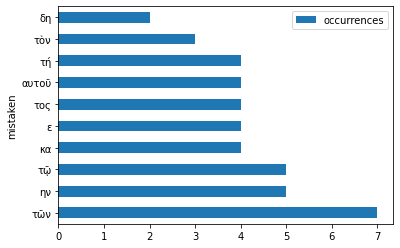

In [76]:
from collections import Counter
LEX = df_results_orig.HUMAN_TRANSCRIPTION.sum().split()
broken_words = [w for w in df_results_orig.B5_RuleBase_best_first.sum().split() if w not in set(LEX)]
x,y = zip(*Counter(broken_words).most_common(10))
pd.DataFrame({"mistaken":x, "occurrences":y}).plot.barh(x="mistaken");

In [81]:
for i in range(len(df_results_orig.HUMAN_TRANSCRIPTION)):
    sent_wrong = df_results_orig.SYSTEM_TRANSCRIPTION[i]    
    sent_predicted = df_results_orig.B4_RuleBase_best_second[i]
    sent_original = df_results_orig.HUMAN_TRANSCRIPTION[i]

    model_change_words = [w for w in sent_predicted.split() if w not in set(sent_wrong.split())]

    must_change_words = [w for w in sent_original.split() if w not in set(sent_wrong.split())]

    if len( set(model_change_words) & set(must_change_words)) != 0:
        print(df_results_orig.ImageID[i], df_results_orig.TEXT_LINE_NUM[i])
        print('wrong:',df_results_orig.SYSTEM_TRANSCRIPTION[i])
        print('model:',df_results_orig.B4_RuleBase_best_second[i])
        print('annot:',df_results_orig.HUMAN_TRANSCRIPTION[i])

        # print(model_change_words)

        # print(must_change_words)

        print('Good:', set(model_change_words) & set(must_change_words))

    # sent_wrong.split()

    # sentence = Sentence(sent)
    # tagger.predict(sentence)
    # for token in sentence:
    #     print(token.text)
    #     print(token.tag)

66 Bodleian-Library-MS-Barocci-127_00136_fol-66v 15
wrong: ο δεεδαμλίατ ειντοις ανων κροισι
model: ο δεεδαμλίατ ἐν τοῖς ανων κροισι
annot: νυνὶ δὲ δημαγωγεῖ ἐν τοῖς ἄνω νεκροῖσι
Good: {'ἐν', 'τοῖς'}
102 Bodleian-Library-MS-Barocci-102_00166_fol-80r.jpg 4
wrong: μολλειν αὐτη διδειγματα περιτῆς ἐν τοῖς νο
model: μολειν αὐτη διδειγματα περι τῆς ἐν τοῖς νο
annot: μελλειν αυτη διδαγματα περι της εν τοις νοη
Good: {'περι'}
102 Bodleian-Library-MS-Barocci-102_00166_fol-80r.jpg 5
wrong: ηκτοις αληθείας ἐντῷοικω του ἀβρααμγενο
model: εκ τοις αληθείας ἐν τῷ οικω του ἀβρααμ γενο
annot: τοις αληθειας εν τω οικω του αβρααμ γενο
Good: {'τοις', 'οικω', 'γενο'}
102 Bodleian-Library-MS-Barocci-102_00166_fol-80r.jpg 9
wrong: λοκναι παρα του ιακωρτας γναικασπερι
model: λοκναι παρα του ιακωρτας γυναικας περι
annot: χθηναι παρα του ιακωβ τας γυναικας περι
Good: {'περι', 'γυναικας'}
102 Bodleian-Library-MS-Barocci-102_00166_fol-80r.jpg 11
wrong: ποδιουον τος εκτῆς ἐιδωλολατροίας καιτ
model: ποδιουον τος εκ 

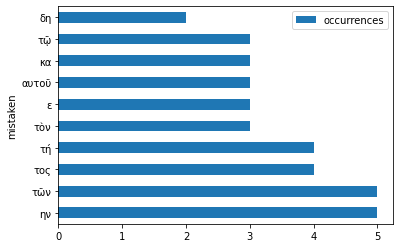

In [64]:
from collections import Counter
LEX = df_results_orig.HUMAN_TRANSCRIPTION.sum().split()
broken_words = [w for w in df_results_orig.SYSTEM_TRANSCRIPTION.sum().split() if w not in set(LEX)]
x,y = zip(*Counter(broken_words).most_common(10))
pd.DataFrame({"mistaken":x, "occurrences":y}).plot.barh(x="mistaken");

In [66]:
df_results_orig.SYSTEM_TRANSCRIPTION.sum().split()

['ὑπρ',
 'τη',
 'συνευςδιξοεανδνυπορ',
 'ποοδυπραςἢ',
 'μητακχεφιλοχορ',
 'εύτα',
 'δυ',
 'μπρο',
 'πρενπεμεσυ',
 'σ',
 'κατεχισωμε',
 'ἐπιτελωτικ',
 'ἀπαὐτελετία',
 'τὸν',
 'δεὲ',
 'τὸν',
 'σανἀαλισκόνκ',
 'τὸρακον',
 'καξεύδὡςτα',
 'ξήμής',
 'παιξτεεχηρευτακχεφιλοχορ',
 'ευτα',
 'συμπρο',
 'πρμπεμεγὶ',
 'τραβλάκας',
 'κμειρακισηγυαο',
 'δή',
 'κατεδθνς',
 'νλλς',
 'ὑπροσιτοὲ',
 'υμεσαι',
 'σρύχετωνο',
 'παραρραία',
 'ττιτοι',
 'προηυιακχεφιλοχερευτα',
 'συμπεο',
 'πεμπεμεεοδαειπι',
 'φιλακολουδος',
 'εμαςκμετ',
 'αυτῆς',
 'παι',
 'ξνχωρευεν',
 'καλομυτςκἀὼ',
 'ε',
 'προου',
 'βδδμος',
 'δη',
 'τε',
 'κοίντη',
 'σνα',
 'τα',
 'τρξηςὸς',
 'επιετος',
 'ων',
 'ουκ',
 'φυς',
 'φρατοραςο',
 'δεεδαμλίατ',
 'ειντοις',
 'ανων',
 'κροισικἀσιτα',
 'πρῴτα',
 'ξόκ',
 'ειμοχθηριττν',
 'κλεισθεν',
 'ην',
 'δάκχω',
 'σνταις',
 'ταφαὶ',
 'πρωατατὶλλεινε',
 'ττοὐεπράτιειντας',
 'γναθουςκαἀκόδετπτεισκεικύφις',
 'κακλα',
 'καντκραςὴρ',
 'ἀλλ',
 'ῶήσαι',
 'καρπεπρα',
 'τετιλμενἀλλ',
 'εήσιθως',
 'οματειρ

# Appendix


In [ ]:
%%capture
!python -m spacy download el_core_news_sm

In [ ]:
import spacy
from spacy.lang.el.examples import sentences 

nlp = spacy.load("el_core_news_sm")
doc = nlp('Ἴακχε φιλοχορευτά συμπρόπεμπέ με')
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

In [ ]:
from termcolor import colored
from spacy import displacy

doc = list(nlp.pipe(df_results_orig['HUMAN_TRANSCRIPTION']))
for count, doc in enumerate(doc):  
    
    print('Title:', count, colored((doc), 'red' , attrs=['bold']))

    # entity visualizer, ent, highlights named entities and their labels in a text.
    displacy.render(doc, style='ent', jupyter=True)

In [ ]:
# list(nlp.pipe(train_data.Title))

# ValueError: [E096] Invalid object passed to displaCy: Can only visualize `Doc` or Span 
# objects, or dicts if set to `manual=True`.

In [ ]:
%%capture
!pip install transformers
!pip install unicodedata
!pip install flair

In [ ]:
from transformers import AutoTokenizer, AutoModel
tokeniser = AutoTokenizer.from_pretrained("pranaydeeps/Ancient-Greek-BERT")
model = AutoModel.from_pretrained("pranaydeeps/Ancient-Greek-BERT")  

In [ ]:
# from flair.models import SequenceTagger
# tagger = SequenceTagger.load('SuperPeitho-FLAIR-v2/final-model.pt')